## 확률변수

### 예제 6-3: 두 주사위의 차의 절대값

In [2]:
import numpy as np
import matplotlib.pyplot as plt

- 상태공간

In [7]:
d1 = [1,2,3,4,5,6]
d2 = [1,2,3,4,5,6]

X = list()
for i in d1:
    for j in d2:
        X.append(abs(i-j))
x_set = np.array(list(set(X)))
x_set

array([0, 1, 2, 3, 4, 5])

- 확률질량함수

In [29]:
def f(x):
    cnt = 0
    for i in d1:
        for j in d2:
            if abs(i-j) == x:
                cnt += 1
    return cnt / (len(d1)*len(d2))

In [30]:
f(2)   # return되어 온 값은 확률

0.2222222222222222

In [31]:
X = [x_set, f]

- 확률변수에 대한 확률


In [32]:
prob = np.array([ f(x) for x in x_set ])
prob

array([0.16666667, 0.27777778, 0.22222222, 0.16666667, 0.11111111,
       0.05555556])

In [33]:
dict(zip(x_set, np.round(prob,3)))

{0: 0.167, 1: 0.278, 2: 0.222, 3: 0.167, 4: 0.111, 5: 0.056}

In [34]:
np.sum(prob)

1.0

In [35]:
import math
math.fsum(prob)

1.0

- 기대값 

In [127]:
np.sum([ x * f(x) for x in x_set ])

3.75

- 그래프 나타내기

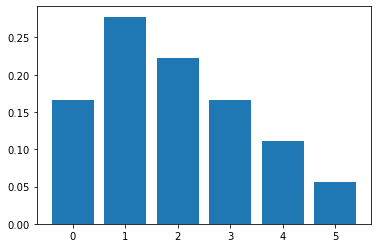

In [36]:
plt.bar(x_set, prob)
plt.show()

- (누적)분포함수

In [37]:
def F(x):
    return np.sum([ f(x_k) for x_k in x_set if x_k <= x ])

In [38]:
# def F(x):
#     a = 0
#     for x_k in x_set:
#         if x_k <= x:
#             a += x_k
#     return a

In [39]:
F(3)

0.8333333333333333

### 연속확률변수

### 예제: 20세 이상 남성 키 데이터 그래프로 표현하기

- 데이터 출처: https://sizekorea.kr/ 신체치수데이터

In [54]:
import pandas as pd

In [55]:
data = pd.read_csv('data/sample_10.csv', encoding='utf-8')
data

,성별,나이,키
0,남,25,1736.0
1,남,28,1833.0
2,남,19,1744.0
3,남,20,1751.0
4,남,22,1851.0
...,...,...,...
6415,여,20,1706.0
6416,여,20,1624.0
6417,여,44,1508.0
6418,여,20,1574.0


In [88]:
df = pd.DataFrame(data)
df = df.query("성별=='남' and 나이 >= 20 and 나이 <30")
df['키'] = df['키'] // 10
df

,성별,나이,키
0,남,25,173.0
1,남,28,183.0
3,남,20,175.0
4,남,22,185.0
5,남,23,178.0
...,...,...,...
4853,남,25,168.0
4856,남,29,174.0
4857,남,25,173.0
4867,남,24,168.0


In [89]:
#히스토그램 구간 지정하기
bins = np.linspace(min(height), max(height), 10)
bins

array([157.        , 160.77777778, 164.55555556, 168.33333333,
       172.11111111, 175.88888889, 179.66666667, 183.44444444,
       187.22222222, 191.        ])

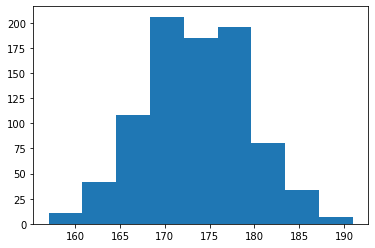

In [90]:
height = set(df['키'])
bins = list(map(int, height))
bins = np.linspace(min(height), max(height), 10) 
plt.hist(df['키'], bins)
plt.show()

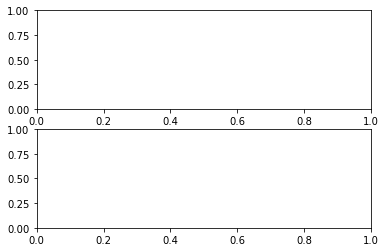

In [91]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
plt.show()

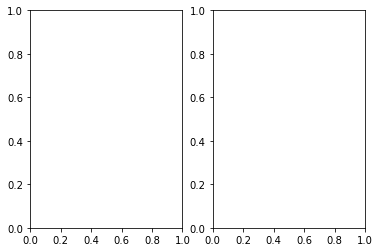

In [92]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
plt.show()

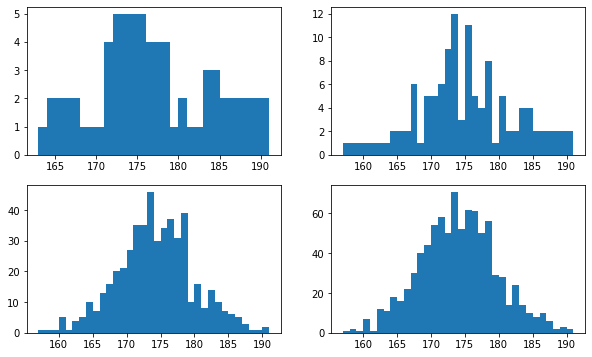

In [100]:
w, h = 10,6
fig = plt.figure(figsize=(w,h))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

data1 = df.head(50)
data2 = df.head(100)
data3 = df.head(500)
data4 = df

bins1  = list(map(int,set(data1['키'])))
bins2  = list(map(int,set(data2['키'])))
bins3  = list(map(int,set(data3['키'])))
bins4  = list(map(int,set(df['키'])))

ax1.hist(data1['키'],bins=bins1)
ax2.hist(data2['키'],bins=bins2)
ax3.hist(data3['키'],bins=bins3)
ax4.hist(df['키'],bins=bins4)

plt.show()

### 그래프에서 수직선, 수평선 그리고 색칠하기

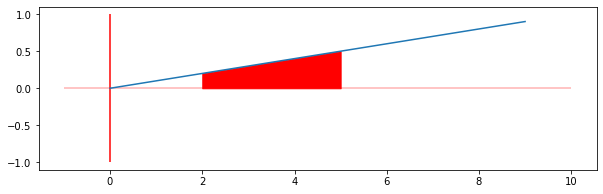

In [116]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(1,1,1)

X = np.arange(0,10,1)
Y = np.linspace(0,0.9,10)

ax.hlines(0,-1,10, alpha=0.3, colors='r')
ax.vlines(0,-1,1, colors='r')

ax.fill_between(X, Y, where=(X>=2)&(X<6), color='red' )

ax.plot(X, Y)
plt.show()

### 확률밀도함수

### 예제: 6-7

- 상태구간

In [117]:
x_range = np.array([0,4])
x_range

array([0, 4])

- 확률밀도함수

In [120]:
def f(x):
    #if x > x_range[0] and x <= x_range[1]:
    if x_range[0] < x <= x_range[1]:
        return 1/8*x
    else:
        return 0        

- 연속확률변수

In [122]:
X = [x_range, f]

- 그래프 그리기

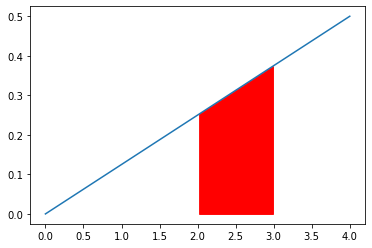

In [126]:
x_ = np.linspace(x_range[0], x_range[1], 100)
y_ = [ f(i) for i in x_ ]

plt.plot(x_, y_)
plt.fill_between(x_,y_, where=(x_>2)&(x_<=3), color='red' )

plt.show()